In [ ]:
from google.colab import files
files.upload()


Saving dogs-vs-cats.zip to dogs-vs-cats.zip


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!unzip /content/drive/MyDrive/dogs-vs-cats.zip

Archive:  /content/drive/MyDrive/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [9]:
!unzip /content/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [38]:
import os, shutil, pathlib

src_dir_ = pathlib.Path("train")
tgt_base_dir = pathlib.Path("cats_vs_dogs_small_1")

def creatingSubset(setType, idx_start, idx_end):
    for a in ("cat", "dog"):
        sub_dir = tgt_base_dir / setType / a
        os.makedirs(sub_dir)
        names_file = [f"{a}.{i}.jpg" for i in range(idx_start, idx_end)]
        for name_file in names_file:
            shutil.copyfile(src=src_dir_ / name_file,
                            dst=sub_dir / name_file)

creatingSubset("data_training", idx_start=0, idx_end=1000)
creatingSubset("data_validation", idx_start=1000, idx_end=1500)
creatingSubset("data_testing", idx_start=1500, idx_end=2000)

In [39]:
from tensorflow import keras
from tensorflow.keras import layers

ipt = keras.Input(shape=(180, 180, 3))
z = layers.Rescaling(1./255)(ipt)
z = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(z)
z = layers.Flatten()(z)
oput = layers.Dense(1, activation="sigmoid")(z)
mdl = keras.Model(inputs=ipt, outputs=oput)

In [40]:
mdl.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
mdl.compile(loss="binary_crossentropy",
            optimizer="rmsprop",
            metrics=["accuracy"])


To prevent overfitting, we apply regularization techniques during the data preprocessing stage. At this point, each image is converted into a tensor.

In [42]:
from tensorflow.keras.utils import image_dataset_from_directory

data_dataset_training = image_dataset_from_directory(
    tgt_base_dir / "data_training",
    image_size=(180, 180),
    batch_size=32)

data_dataset_validation = image_dataset_from_directory(
    tgt_base_dir / "data_validation",
    image_size=(180, 180),
    batch_size=32)

data_dataset_testing = image_dataset_from_directory(
    tgt_base_dir / "data_testing",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Callbacks can be used to stop training early if the model does not progress or to save the model's weights after each epoch. They can also help to control the learning rate, record metrics, and visualize the model's performance.

In [44]:
from tensorflow import keras

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch1.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = mdl.fit(
    data_dataset_training,
    epochs=10,
    validation_data=data_dataset_validation,
    callbacks=callbacks
)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.5302 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.5367 - loss: 0.6960 - val_accuracy: 0.5160 - val_loss: 0.6917
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.5392 - loss: 0.6921 - val_accuracy: 0.6060 - val_loss: 0.6659
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.6231 - loss: 0.6824 - val_accuracy: 0.6530 - val_loss: 0.6228
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.6543 - loss: 0.6294 - val_accuracy: 0.6140 - val_loss: 0.6386
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.6872 - loss: 0.5897 - val_accuracy: 0.6110 - val_loss: 0.6544
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.7146 - loss: 0.5559 - val_accuracy: 0.6800 - val_loss: 0.5787
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.7444 - loss: 0.5208 - val_accuracy: 0.6440 - v

As the number of epochs increases, the accuracy tends to rise, with values reaching 77.4% for training accuracy, 71.60% for validation accuracy, and 69% for test accuracy.

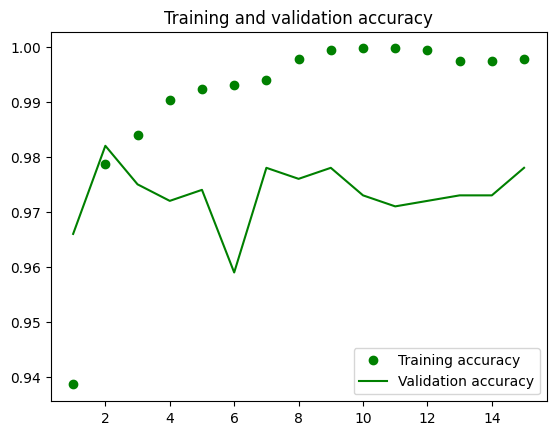

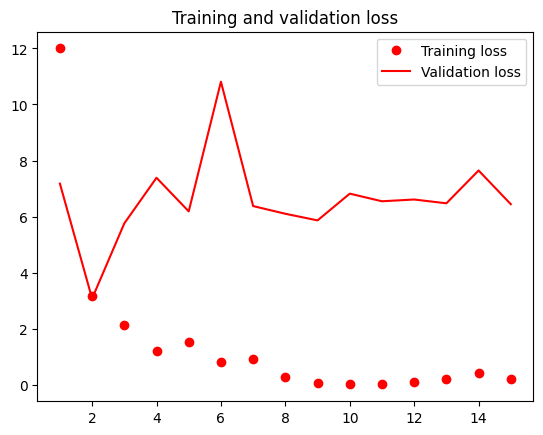

In [99]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "go", label="Training accuracy")
plt.plot(epochs, val_accuracy, "g", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [51]:
test_mdl = keras.models.load_model("convnet_from_scratch1.keras")
test_lossVal, test_acc_Value = test_mdl.evaluate(data_dataset_testing)
print(f"Test accuracy: {test_acc_Value:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6861 - loss: 0.5986
Test accuracy: 0.690


Test accuracy with no data augmentation=69%

**Data Augmentation**

Data augmentation is a strategy for increasing the size of a training set by generating new, modified versions of the original data. This reduces overfitting and improves the model's generalizability.

In [45]:
aug_data = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


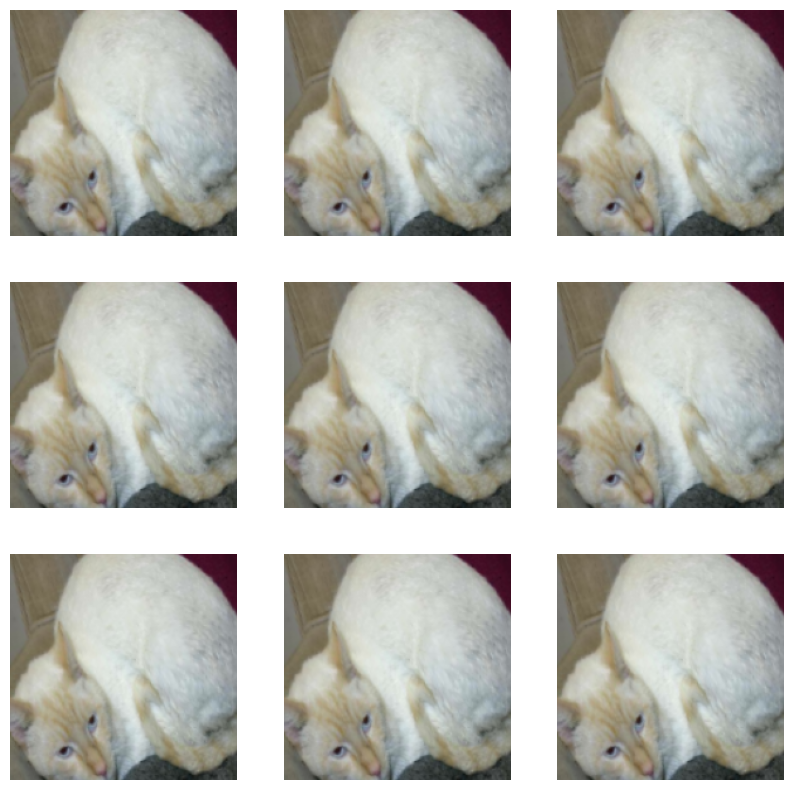

In [98]:
from keras.preprocessing.image import load_img

plt.figure(figsize=(10,10))
for images, _ in data_dataset_training.take(1) :
  for i in range(9) :
    aug_data = data_augmentation(images)
    ax = plt.subplot(3, 3 , i+1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [46]:
ipt = keras.Input(shape=(180, 180, 3))
z = aug_data(ipt)
z = layers.Rescaling(1./255)(z)
z = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(z)
z = layers.Flatten()(z)
z = layers.Dropout(0.5)(z)
oput = layers.Dense(1, activation="sigmoid")(z)
mdl = keras.Model(inputs=ipt, outputs=oput)

mdl.compile(loss="binary_crossentropy",
            optimizer="rmsprop",
            metrics=["accuracy"])

In [48]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = mdl.fit(
    data_dataset_training,
    epochs=10,
    validation_data=data_dataset_validation,
    callbacks=callbacks
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.4917 - loss: 0.7111 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.5252 - loss: 0.6945 - val_accuracy: 0.6270 - val_loss: 0.6890
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.5615 - loss: 0.6820 - val_accuracy: 0.5370 - val_loss: 0.6787
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.5979 - loss: 0.6592 - val_accuracy: 0.5350 - val_loss: 0.6816
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.6467 - loss: 0.6486 - val_accuracy: 0.6370 - val_loss: 0.6326
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.6575 - loss: 0.6418 - val_accuracy: 0.6190 - val_loss: 0.6848
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - accuracy: 0.6728 - loss: 0.6051 - val_accuracy: 0.6230 - val_loss: 0.6404
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.6678 - loss: 0.6108 - val_accuracy: 0.5330 - v

In [53]:
test_mdl = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.keras"
)
test_lossVal, test_acc_Value = test_mdl.evaluate(data_dataset_testing)
print(f"Test accuracy: {test_acc_Value:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6296 - loss: 0.6313
Test accuracy: 0.623


Although doing data augmentation on the model did not result in improved results, it is still possible to verify this by trying data augmentation on a larger training sample.

accuracy=70.38% val_acc=65.60% test_acc=62.3%

Test accuracy was not improved

**2.Increase training sample size**

Attempted to increase training sample size from 1000 to 1500.

In [54]:
import os
import shutil
import pathlib

src_dir_ = pathlib.Path("train")
tgt_base_dir = pathlib.Path("cats_vs_dogs_small_2")

def create_subSet(setType, idx_start, idx_end):
    for a in ("cat", "dog"):
        sub_dir = tgt_base_dir / setType / a
        os.makedirs(sub_dir, exist_ok=True)
        names_file = [f"{a}.{i}.jpg" for i in range(idx_start, idx_end)]
        for fname in names_file:
            shutil.copyfile(src=src_dir_ / fname,
                            dst=sub_dir / fname)

create_subSet("data_training", idx_start=0, idx_end=1500)
create_subSet("data_validation", idx_start=1500, idx_end=2000)
create_subSet("data_testing", idx_start=2000, idx_end=2500)

In [55]:
from tensorflow.keras.utils import image_dataset_from_directory

data_dataset_training = image_dataset_from_directory(
    tgt_base_dir / "data_training",
    image_size=(180, 180),
    batch_size=32
)

data_dataset_validation = image_dataset_from_directory(
    tgt_base_dir / "data_validation",
    image_size=(180, 180),
    batch_size=32
)

data_dataset_testing = image_dataset_from_directory(
    tgt_base_dir / "data_testing",
    image_size=(180, 180),
    batch_size=32
)

Found 3000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [56]:
ipt = keras.Input(shape=(180, 180, 3))
z = layers.Rescaling(1./255)(ipt)
z = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(z)
z = layers.Flatten()(z)
oput = layers.Dense(1, activation="sigmoid")(z)
mdl = keras.Model(inputs=ipt, outputs=oput)

mdl.compile(loss="binary_crossentropy",
            optimizer="rmsprop",
            metrics=["accuracy"])

In [57]:
_callBacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch2.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = mdl.fit(
    data_dataset_training,
    epochs=10,
    validation_data=data_dataset_validation,
    callbacks=_callBacks
)


Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms/step - accuracy: 0.5064 - loss: 0.6966 - val_accuracy: 0.5030 - val_loss: 0.6922
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.5702 - loss: 0.6828 - val_accuracy: 0.6130 - val_loss: 0.7441
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.6364 - loss: 0.6482 - val_accuracy: 0.6610 - val_loss: 0.6281
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.6776 - loss: 0.6035 - val_accuracy: 0.5420 - val_loss: 0.8883
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.7144 - loss: 0.5781 - val_accuracy: 0.6970 - val_loss: 0.6717
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - accuracy: 0.7398 - loss: 0.5373 - val_accuracy: 0.7040 - val_loss: 0.6013
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.7603 - loss: 0.4952 - val_accuracy: 0.7010 - val_loss: 0.6243
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.7977 - loss: 0.4350 - val_accuracy: 0.688

In [58]:
mdl_test = keras.models.load_model(
    "convnet_from_scratch2.keras"
)
lossVal_test, acc_Value_test = mdl_test.evaluate(data_dataset_testing)
print(f"Test accuracy: {acc_Value_test:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7802 - loss: 0.5795
Test accuracy: 0.785


Accuracy=84.59% val_acc=75.4% test_acc=78%

using data augmentation

In [59]:
aug_data = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [60]:
ipt = keras.Input(shape=(180, 180, 3))
z = aug_data(ipt)
z = layers.Rescaling(1./255)(z)
z = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(z)
z = layers.Flatten()(z)
z = layers.Dropout(0.5)(z)
oput = layers.Dense(1, activation="sigmoid")(z)
mdl = keras.Model(inputs=ipt, outputs=oput)

mdl.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [61]:
_callBacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation2.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = mdl.fit(
    data_dataset_training,
    epochs=10,
    validation_data=data_dataset_validation,
    callbacks=_callBacks
)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.5093 - loss: 0.6957 - val_accuracy: 0.5010 - val_loss: 0.6811
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.5273 - loss: 0.6788 - val_accuracy: 0.5110 - val_loss: 0.7024
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.5786 - loss: 0.6637 - val_accuracy: 0.6080 - val_loss: 0.7083
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - accuracy: 0.6234 - loss: 0.6435 - val_accuracy: 0.6350 - val_loss: 0.6678
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.6625 - loss: 0.6055 - val_accuracy: 0.6660 - val_loss: 0.6245
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.7162 - loss: 0.5711 - val_accuracy: 0.6930 - val_loss: 0.5811
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.6912 - loss: 0.5887 - val_accuracy: 0.6590 - val_loss: 0.6395
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.7082 - loss: 0.5618 - val_accuracy: 0.7050 

In [64]:
mdl_test = keras.models.load_model(
    "convnet_from_scratch_with_augmentation2.keras"
)
lossVal_test, acc_Value_test = mdl_test.evaluate(data_dataset_testing)
print(f"Test accuracy: {acc_Value_test:.3f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7418 - loss: 0.5273
Test accuracy: 0.743


Accuracy=71.5% val_acc=71.2% test_acc=4.3%

**3.Finding the ideal training sample size**

We set the training, validation, and test set sizes, respectively, to 1500, 1000, and 500

In [62]:
import os
import shutil
import pathlib

src_dir_ = pathlib.Path("train")
tgt_base_dir = pathlib.Path("cats_vs_dogs_small_3")

def create_subSet(setType, idx_start, idx_end):
    for a in ("cat", "dog"):
        sub_dir = tgt_base_dir / setType / a
        os.makedirs(sub_dir, exist_ok=True)
        names_file = [f"{a}.{i}.jpg" for i in range(idx_start, idx_end)]
        for fname in names_file:
            shutil.copyfile(src=src_dir_ / fname, dst=sub_dir / fname)

create_subSet("train", idx_start=0, idx_end=1500)
create_subSet("validation", idx_start=1500, idx_end=2500)
create_subSet("test", idx_start=2500, idx_end=3000)

In [65]:
from tensorflow.keras.utils import image_dataset_from_directory

data_dataset_training = image_dataset_from_directory(
    tgt_base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)

data_dataset_validation = image_dataset_from_directory(
    tgt_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32
)

data_dataset_testing = image_dataset_from_directory(
    tgt_base_dir / "test",
    image_size=(180, 180),
    batch_size=32
)

Found 3000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [66]:
ipt = keras.Input(shape=(180, 180, 3))
z = layers.Rescaling(1./255)(ipt)
z = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(z)
z = layers.Flatten()(z)
oput = layers.Dense(1, activation="sigmoid")(z)
mdl = keras.Model(inputs=ipt, outputs=oput)

mdl.compile(loss="binary_crossentropy",
            optimizer="rmsprop",
            metrics=["accuracy"])

In [67]:
_callBacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch3.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]
history = mdl.fit(
    data_dataset_training,
    epochs=10,
    validation_data=data_dataset_validation,
    callbacks=_callBacks
)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 112ms/step - accuracy: 0.5175 - loss: 0.7080 - val_accuracy: 0.5025 - val_loss: 0.6905
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.5602 - loss: 0.6904 - val_accuracy: 0.6435 - val_loss: 0.6552
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.5883 - loss: 0.6670 - val_accuracy: 0.6575 - val_loss: 0.6284
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.6388 - loss: 0.6345 - val_accuracy: 0.6890 - val_loss: 0.5858
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.7108 - loss: 0.5804 - val_accuracy: 0.6880 - val_loss: 0.5756
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.7057 - loss: 0.5595 - val_accuracy: 0.6075 - val_loss: 0.7807
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.7394 - loss: 0.5244 - val_accuracy: 0.7320 - val_loss: 0.5315
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.7561 - loss: 0.4974 - val_accuracy: 0.75

In [69]:
mdl_test = keras.models.load_model(
    "convnet_from_scratch3.keras"
)
lossVal_test, acc_Value_test = mdl_test.evaluate(data_dataset_testing)
print(f"Test accuracy: {acc_Value_test:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7904 - loss: 0.5144
Test accuracy: 0.759


Accuracy=82.67% val_Acc=75.4% test_Acc=75.9%

Using Data augmentation

In [70]:
aug_data = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [71]:
ipt = keras.Input(shape=(180, 180, 3))
z = aug_data(ipt)
z = layers.Rescaling(1./255)(z)
z = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(z)
z = layers.MaxPooling2D(pool_size=2)(z)
z = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(z)
z = layers.Flatten()(z)
z = layers.Dropout(0.5)(z)
oput = layers.Dense(1, activation="sigmoid")(z)
mdl = keras.Model(inputs=ipt, outputs=oput)

mdl.compile(loss="binary_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [73]:
_callBacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = mdl.fit(
    data_dataset_training,
    epochs=10,
    validation_data=data_dataset_validation,
    callbacks=_callBacks)


Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.5245 - loss: 0.6952 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.4988 - loss: 0.6927 - val_accuracy: 0.5005 - val_loss: 0.6918
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.5255 - loss: 0.6928 - val_accuracy: 0.5205 - val_loss: 0.6930
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.5260 - loss: 0.6885 - val_accuracy: 0.6195 - val_loss: 0.6676
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.5387 - loss: 0.6821 - val_accuracy: 0.5995 - val_loss: 0.6798
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.5871 - loss: 0.6797 - val_accuracy: 0.6305 - val_loss: 0.6554
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6099 - loss: 0.6562 - val_accuracy: 0.6385 - val_loss: 0.6393
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.6368 - loss: 0.6445 - val_accuracy: 0.653

In [74]:
mdl_test = keras.models.load_model(
    "convnet_from_scratch_with_augmentation3.keras")
lossVal_test, acc_Value_test = mdl_test.evaluate(data_dataset_testing)
print(f"Test accuracy: {acc_Value_test:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6495 - loss: 0.6407
Test accuracy: 0.654


Accuracy=67.4% val_acc=66.2% test_acc=65.4%

**4.Using a pre-trained network**

VGG16 is the architecture of this pre-trained network.

Feature extraction - Instantiating the VGG16 convolutional base

In [75]:
ba_seConv = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)
ba_seConv.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Feature extraction - Extracting features and corresponding labels

In [76]:
import numpy as np

def featuresAndLabels_Get(dataset):
    features_list = []
    labels_list = []
    for imgs, lbls in dataset:
        preprocessed_imgs = keras.applications.vgg16.preprocess_input(imgs)
        feature_set = ba_seConv.predict(preprocessed_imgs)
        features_list.append(feature_set)
        labels_list.append(lbls)
    return np.concatenate(features_list), np.concatenate(labels_list)

train_features, train_labels = featuresAndLabels_Get(train_dataset)
val_features, val_labels = featuresAndLabels_Get(validation_dataset)
test_features, test_labels = featuresAndLabels_Get(test_dataset)

train_features.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

(3000, 5, 5, 512)

Feature extraction - Defining and training the densely connected classifier

In [78]:
ipt = keras.Input(shape=(5, 5, 512))
z = layers.Flatten()(ipt)
z = layers.Dense(256)(z)
z = layers.Dropout(0.5)(z)
oput = layers.Dense(1, activation="sigmoid")(z)
mdl = keras.Model(inputs=ipt, outputs=oput)

mdl.compile(loss="binary_crossentropy",
            optimizer="rmsprop",
            metrics=["accuracy"])

_callBacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extractionPT1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = mdl.fit(
    train_features, train_labels,
    epochs=15,
    validation_data=(val_features, val_labels),
    callbacks=_callBacks)

Epoch 1/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9036 - loss: 20.6505 - val_accuracy: 0.9660 - val_loss: 7.1763
Epoch 2/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9772 - loss: 2.6160 - val_accuracy: 0.9820 - val_loss: 3.0761
Epoch 3/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9862 - loss: 1.6699 - val_accuracy: 0.9750 - val_loss: 5.7563
Epoch 4/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9901 - loss: 1.0134 - val_accuracy: 0.9720 - val_loss: 7.3840
Epoch 5/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9934 - loss: 1.2283 - val_accuracy: 0.9740 - val_loss: 6.1850
Epoch 6/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9932 - loss: 0.8453 - val_accuracy: 0.9590 - val_loss: 10.8111
Epoch 7/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9941 - loss: 0.9486 - val_accuracy: 0.9780 - val_loss: 6.3744
Epoch 8/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9989 - loss: 0.1618 - val_accuracy: 0.9760 - val_lo

accuracy=99.7% val_acc=97.8%

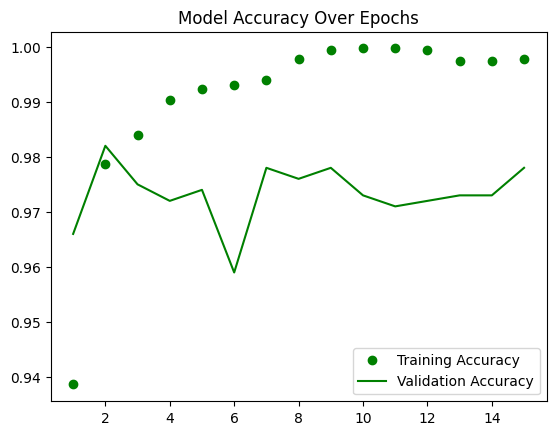

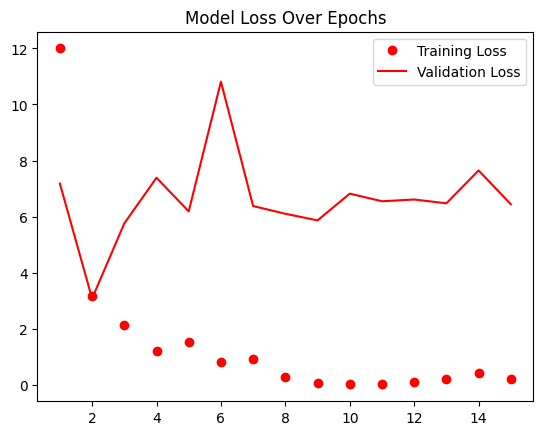

In [79]:
import matplotlib.pyplot as pl

acc_Value = history.history["accuracy"]
val_acc_Value = history.history["val_accuracy"]
lossVal = history.history["loss"]
val_lossVal = history.history["val_loss"]
epochs = range(1, len(acc_Value) + 1)

pl.plot(epochs, acc_Value, "go", label="Training Accuracy")
pl.plot(epochs, val_acc_Value, "g", label="Validation Accuracy")
pl.title("Model Accuracy Over Epochs")
pl.legend()

pl.figure()
pl.plot(epochs, lossVal, "ro", label="Training Loss")
pl.plot(epochs, val_lossVal, "r", label="Validation Loss")
pl.title("Model Loss Over Epochs")
pl.legend()

pl.show()

In [80]:
ba_seConv = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False
)
ba_seConv.trainable = False

ba_seConv.trainable = True
print("Number of trainable weights before freezing the convolution base:", len(ba_seConv.trainable_weights))

ba_seConv.trainable = False
print("Number of trainable weights after freezing the convolution base:", len(ba_seConv.trainable_weights))


Number of trainable weights before freezing the convolution base: 26
Number of trainable weights after freezing the convolution base: 0


Feature extraction with Data Augmentation

In [81]:
aug_data = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

ipt = keras.Input(shape=(180, 180, 3))
z = aug_data(ipt)
z = keras.applications.vgg16.preprocess_input(z)
z = ba_seConv(z)
z = layers.Flatten()(z)
z = layers.Dense(256)(z)
z = layers.Dropout(0.5)(z)
oput = layers.Dense(1, activation="sigmoid")(z)
mdl = keras.Model(inputs=ipt, outputs=oput)
mdl.compile(loss="binary_crossentropy",
            optimizer="rmsprop",
            metrics=["accuracy"])


In [82]:
_callBacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentationPT2.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]
hist = mdl.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=_callBacks
)

Epoch 1/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 253ms/step - accuracy: 0.8357 - loss: 45.2425 - val_accuracy: 0.9770 - val_loss: 3.1581
Epoch 2/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 152ms/step - accuracy: 0.9581 - loss: 5.6371 - val_accuracy: 0.9650 - val_loss: 6.2776
Epoch 3/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.9471 - loss: 7.5354 - val_accuracy: 0.9680 - val_loss: 5.3251
Epoch 4/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 154ms/step - accuracy: 0.9642 - loss: 3.8308 - val_accuracy: 0.9810 - val_loss: 3.1332
Epoch 5/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 0.9748 - loss: 2.6789 - val_accuracy: 0.9750 - val_loss: 2.7273


In [83]:
mdl_test = keras.models.load_model(
    "feature_extraction_with_data_augmentationPT2.keras"
)
lossVal_test, acc_Value_test = mdl_test.evaluate(data_dataset_testing)
print(f"Test accuracy: {acc_Value_test:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.9608 - loss: 6.5318
Test accuracy: 0.961


Accuracy=96.1% val_Acc=97.4% test_acc=97.5%

Thank You